In [1]:
# Importiamo le librerie utili
import numpy as np
import matplotlib.pyplot as plt

# Definiamo la funzione f(x) = (x-1)^2 + e^x
def f(x):
    y = (x-1)**2 + np.exp(x)
    
    return y

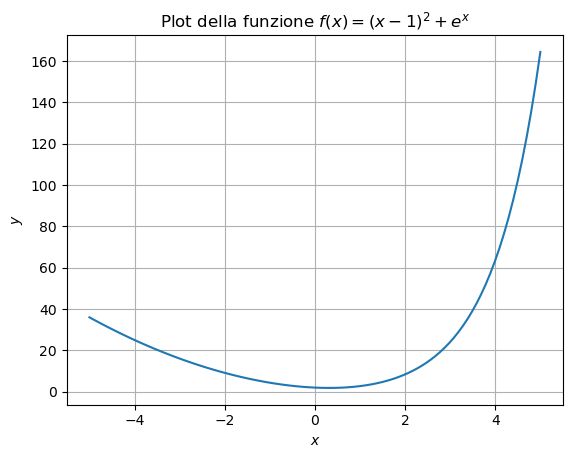

In [2]:
# Definiamo un'intervallo di riferimento
a, b = -5, 5
N = 100 # Numero di punti

# Definiamo una discretizzazione dell'asse x
xx = np.linspace(a, b, N)

# Calcoliamo il rispettivo valore di y
yy = f(xx)

# Plot
plt.plot(xx, yy, '-')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = (x-1)^2 + e^x$')
plt.show()

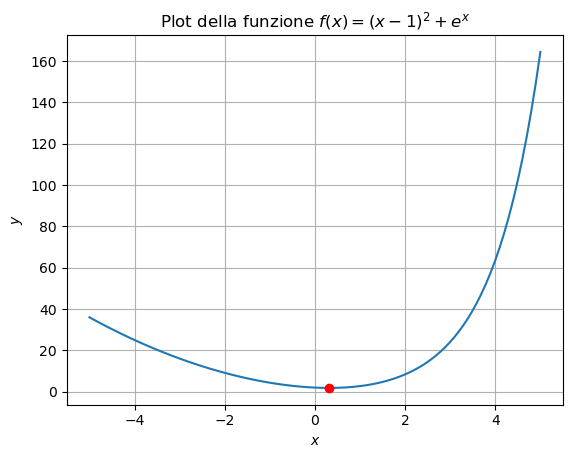

In [3]:
# Definisco il punto di minimo
x_min = 0.31492
y_min = f(x_min)

# Plot
plt.plot(xx, yy, '-')
plt.plot(x_min, y_min, 'ro')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = (x-1)^2 + e^x$')
plt.show()

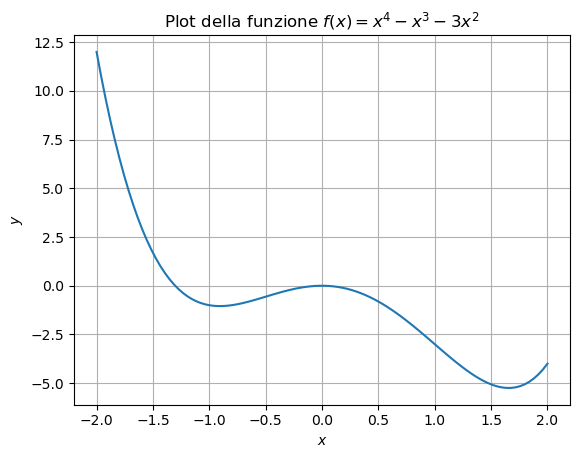

In [4]:
def f(x):
    y = x**4 - x**3 - 3 * x**2
    return y

# Plot
a, b = -2, 2
N = 100

xx = np.linspace(a, b, N)
yy = f(xx)

plt.plot(xx, yy, '-')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = x^4 - x^3 - 3 x^2$')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x-1) ** 2 + np.exp(x)

def df(x):
    return 2*(x-1) + np.exp(x)

In [6]:
def GD(f, df, x0, alpha, maxit=100):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    alpha (float): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    """
    # Inizializzazione
    k = 0

    # Ciclo iterativo (uso un ciclo while)
    while k < maxit:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Preparazione per step successivo
        k = k + 1
        x0 = x

    return x

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
alpha = 1e-2
maxit = 500

# Calcoliamo la soluzione
x_sol = GD(f, df, x0, alpha, maxit)
print(f"Soluzione calcolata: {x_sol:0.5f}")

# A scopo di analisi di prestazioni, misuriamo l'errore rispetto al minimo (noto)
x_true = 0.31492
rel_err = np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)
print(f"Errore Relativo della soluzione calcolata: {rel_err:0.5f}.")

Soluzione calcolata: 0.31492
Errore Relativo della soluzione calcolata: 0.00001.


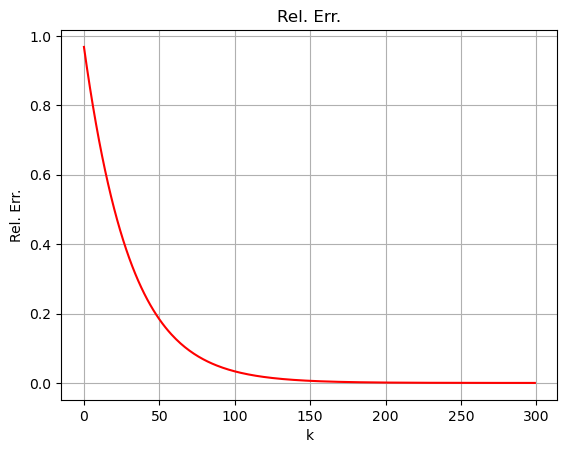

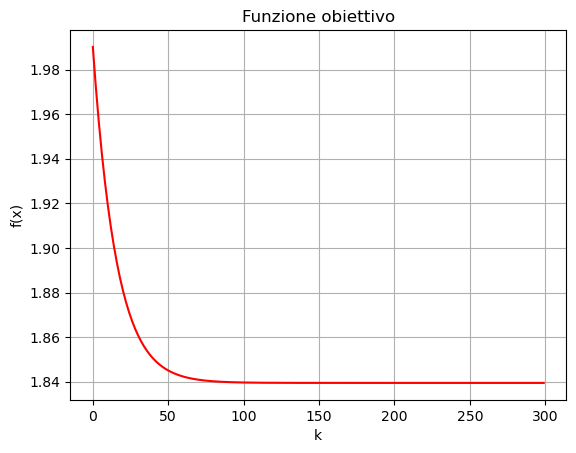

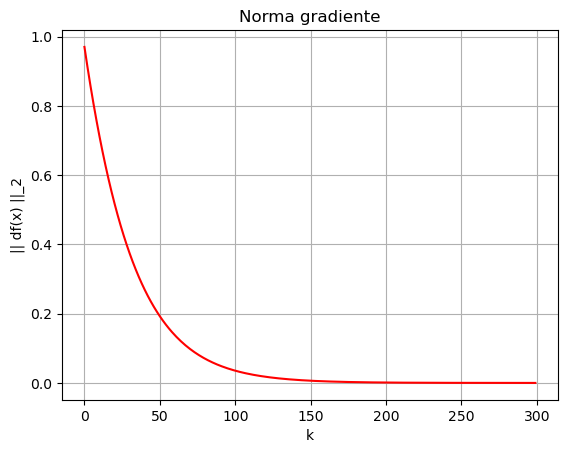

In [7]:
def GD(f, df, x0, x_true, alpha, maxit=100):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    x_true (ndarray): la soluzione esatta dell'algoritmo (nota SOLO in fase di test)
    alpha (float): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    """
    # Inizializzazione
    k = 0
    rel_err = np.zeros((maxit, ))
    obj_val = np.zeros((maxit, ))
    grad_norm = np.zeros((maxit, ))

    # Ciclo iterativo (uso un ciclo while)
    while k < maxit:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Calcolo dell'errore e salvataggio
        rel_err[k] = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        obj_val[k] = f(x)
        grad_norm[k] = np.linalg.norm(df(x))

        # Preparazione per step successivo
        k = k + 1
        x0 = x

    return x, rel_err, obj_val, grad_norm

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
alpha = 1e-2
maxit = 300

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD(f, df, x0, x_true, alpha, maxit)

# Visualizziamo le metriche
plt.plot(np.arange(maxit), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(maxit), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(maxit), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()

Algoritmo terminato in 407 iterazioni.


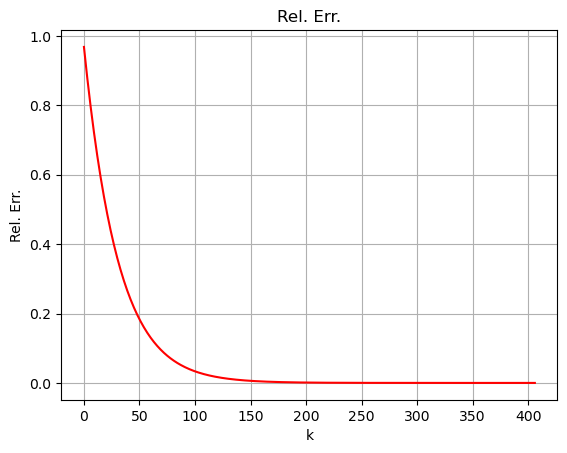

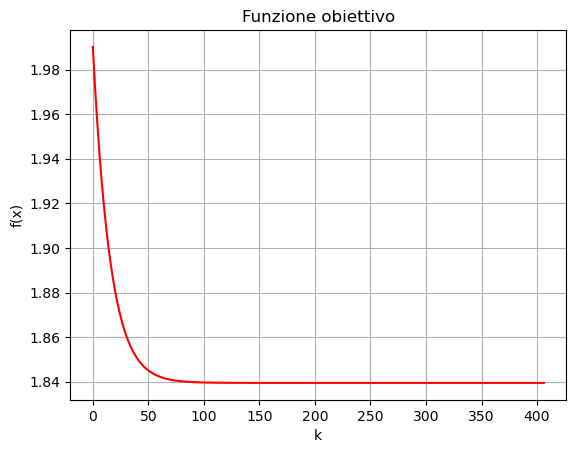

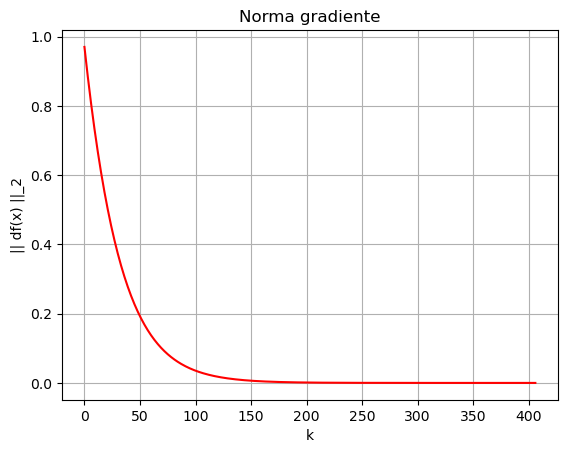

In [8]:
def GD(f, df, x0, x_true, alpha, maxit=100, tolf=1e-6, tolx=1e-6):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    x_true (ndarray): la soluzione esatta dell'algoritmo (nota SOLO in fase di test)
    alpha (float): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    tolf (float): tolleranza di || grad(f) ||_2
    tolx (float): tolleranza di || x_{k+1} - x_k ||_2
    """
    # Inizializzazione
    k = 0
    rel_err = np.zeros((maxit+1, ))
    obj_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))

    # Ciclo iterativo (uso un ciclo while)
    condizione = True
    while condizione:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Calcolo dell'errore e salvataggio
        rel_err[k] = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        obj_val[k] = f(x)
        grad_norm[k] = np.linalg.norm(df(x))

        # Check condizioni di arresto
        condizione = (k < maxit) and (np.linalg.norm(df(x)) > tolf) and (np.linalg.norm(x - x0) > tolx)

        # Se l'algoritmo termina per || x_{k+1} - x_k || < tolx, stampare il warning
        if (np.linalg.norm(x - x0) < tolx):
            print(f"Algoritmo terminato per condizione su tolx.")
            
        # Preparazione per step successivo
        k = k + 1
        x0 = x

    # Se l'algoritmo si ferma prima di maxit, tagliare i valori inutilizzati delle metriche
    if k < maxit:
        rel_err = rel_err[:k]
        obj_val = obj_val[:k]
        grad_norm = grad_norm[:k]

    return x, rel_err, obj_val, grad_norm

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
alpha = 1e-2
maxit = 1000

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD(f, df, x0, x_true, alpha, maxit, tolf=1e-6, tolx=1e-8)
print(f"Algoritmo terminato in {len(rel_err)} iterazioni.")

# Visualizziamo le metriche
plt.plot(np.arange(len(rel_err)), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(len(obj_val)), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(len(grad_norm)), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()

Algoritmo terminato in 9 iterazioni.


/var/folders/5_/jhznq71n5mg661ykhh5bg7nc0000gn/T/ipykernel_83346/3134045273.py:5: RuntimeWarning: overflow encountered in exp
  return (x-1) ** 2 + np.exp(x)
/var/folders/5_/jhznq71n5mg661ykhh5bg7nc0000gn/T/ipykernel_83346/3134045273.py:8: RuntimeWarning: overflow encountered in exp
  return 2*(x-1) + np.exp(x)
/var/folders/5_/jhznq71n5mg661ykhh5bg7nc0000gn/T/ipykernel_83346/2347787700.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  x = x0 - alpha * df(x0)


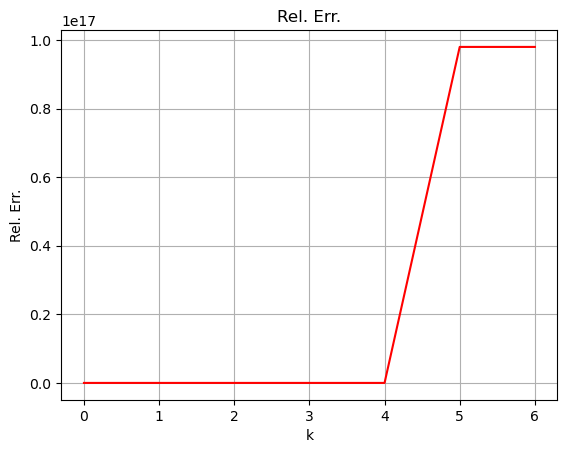

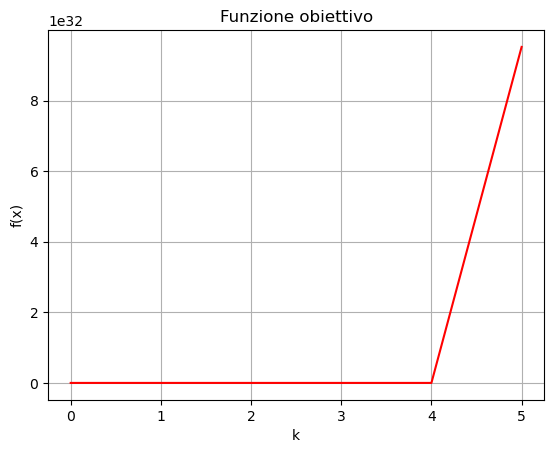

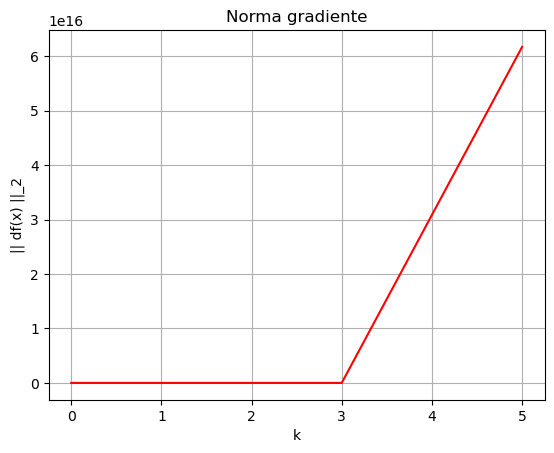

In [9]:
# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
alpha = 1
maxit = 1000

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD(f, df, x0, x_true, alpha, maxit, tolf=1e-6, tolx=1e-8)
print(f"Algoritmo terminato in {len(rel_err)} iterazioni.")

# Visualizziamo le metriche
plt.plot(np.arange(len(rel_err)), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(len(obj_val)), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(len(grad_norm)), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()

Algoritmo terminato in 37 iterazioni.


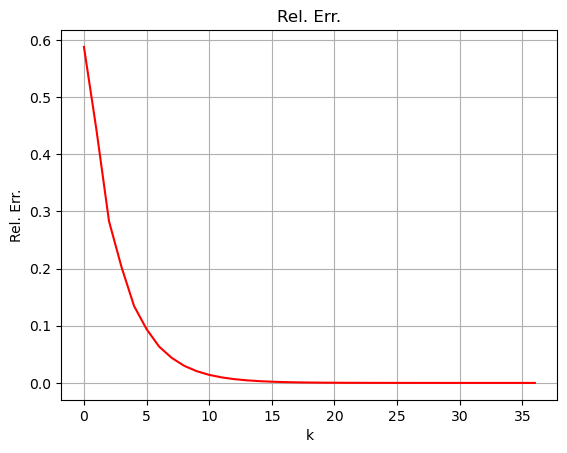

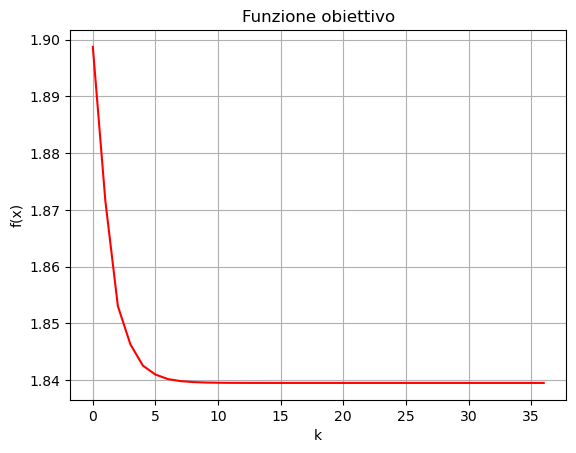

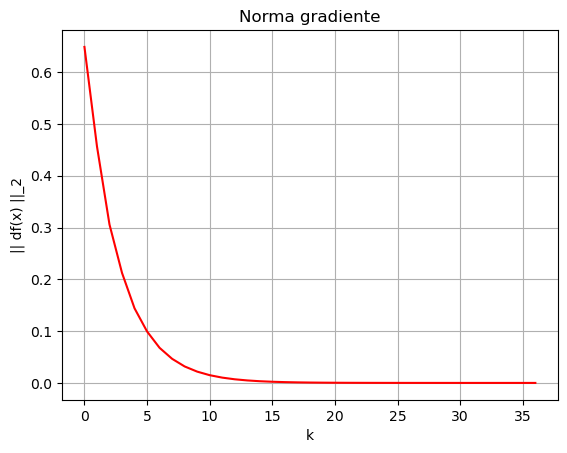

In [10]:
def backtracking(f, df, x, alpha=1, rho=0.5, c=1e-4):
    """
    Algoritmo di backtracking per Discesa Gradiente.

    Parameters:
    f       : Funzione obiettivo.
    df      : Gradiente della funzione obiettivo.
    x       : Iterato x_k.
    alpha   : Stima iniziale di alpha(default 1).
    rho     : Fattore di riduzione (default 0.5).
    c       : Costante delle condizioni di Armijo (default 1e-4).

    Returns:
    alpha   : Learning rate calcolato con backtracking.
    """
    while f(x - alpha * df(x)) > f(x) + c * alpha * np.linalg.norm(df(x))**2:
        alpha *= rho
    return alpha

def GD_backtracking(f, df, x0, x_true, maxit=100, tolf=1e-6, tolx=1e-6):
    r"""
    Implementa il metodo di discesa del gradiente con passo scelto con backtracking applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    x_true (ndarray): la soluzione esatta dell'algoritmo (nota SOLO in fase di test)
    maxit (int): numero di iterazioni
    tolf (float): tolleranza di || grad(f) ||_2
    tolx (float): tolleranza di || x_{k+1} - x_k ||_2
    """
    # Inizializzazione
    k = 0
    rel_err = np.zeros((maxit+1, ))
    obj_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))

    # Ciclo iterativo (uso un ciclo while)
    condizione = True
    while condizione:
        # Scelta di alpha_k con backtracking
        alpha = backtracking(f, df, x0, alpha=1)

        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha * df(x0)

        # Calcolo dell'errore e salvataggio
        rel_err[k] = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        obj_val[k] = f(x)
        grad_norm[k] = np.linalg.norm(df(x))

        # Check condizioni di arresto
        condizione = (k < maxit) and (np.linalg.norm(df(x)) > tolf) and (np.linalg.norm(x - x0) > tolx)

        # Se l'algoritmo termina per || x_{k+1} - x_k || < tolx, stampare il warning
        if (np.linalg.norm(x - x0) < tolx):
            print(f"Algoritmo terminato per condizione su tolx.")
            
        # Preparazione per step successivo
        k = k + 1
        x0 = x

    # Se l'algoritmo si ferma prima di maxit, tagliare i valori inutilizzati delle metriche
    if k < maxit:
        rel_err = rel_err[:k]
        obj_val = obj_val[:k]
        grad_norm = grad_norm[:k]

    return x, rel_err, obj_val, grad_norm

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
maxit = 1000

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD_backtracking(f, df, x0, x_true, maxit, tolf=1e-6, tolx=1e-8)
print(f"Algoritmo terminato in {len(rel_err)} iterazioni.")

# Visualizziamo le metriche
plt.plot(np.arange(len(rel_err)), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(len(obj_val)), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(len(grad_norm)), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()